<a href="https://colab.research.google.com/github/vanessah-26/createAzureMLjobs/blob/vanessah-26-patch-1/General_CV_Data_Preprocess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="#6495ED"><h1><b>MAKE A COPY OF THIS NOTEBOOK SO YOUR EDITS ARE SAVED</b></h1></font>

<h4>Also, please set your runtime to use a GPU by going to the "Runtime" tab, clicking "Change runtime type" and making sure the hardware accelerator selected is "GPU". </h4>

# 🖥 **Welcome to the computer vision data preprocessing notebook!**
In this notebook, we'll look at what we need to do and understand about our data *before* we put it in to the machine learning model. This notebook will act as a guide and a refresher of some of the topics, libraries, and functions we've covered earlier in the course.

Since data for NLP and CV applications is fundamentally different, we'll be separating out the pre-processing into different notebooks. You should be working through this notebook if your project works with **image data**.

In [ ]:
#@title Loading in our data and importing necessary packages
import numpy as np
import pandas as pd
import cv2
import seaborn as sns
import matplotlib.pyplot as plt
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split

from numpy import expand_dims
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# Our data files are very large, so they're stored on Google Cloud
# We can use a command like this to upload it into Google Colab's file system
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Innovators/ML%20Projects/CV%20Pre-Processing%20-%20Flower%20Dataset/flower_images.npy"
!wget -q --show-progress "https://storage.googleapis.com/inspirit-ai-data-bucket-1/Data/AI%20Innovators/ML%20Projects/CV%20Pre-Processing%20-%20Flower%20Dataset/labels.npy"

flower_images.npy   100%[===================>] 210.18M  97.3MB/s    in 2.2s    
labels.npy          100%[===================>] 114.91K  --.-KB/s    in 0.004s  


In [ ]:
# .npy is a numpy file type we can use to store numpy arrays
flower_data = np.load("flower_images.npy")
labels = np.load("labels.npy")


# 🧰 **Standard Tools to Review**

Here are some functions that we've used before throughout the course that will come in handy while working on your project!

## 🔢 **Numpy functions**
### **Using `.shape`:**
We can use `.shape` to see the shape of any numpy array by doing

```python
ARRAY_NAME.shape or np.shape(ARRAY_NAME)
```
[See the documentation here](https://numpy.org/doc/stable/reference/generated/numpy.shape.html).

### **Using `np.reshape`:**
We can use `np.reshape` to see the shape of any numpy array by doing

```python
ARRAY_NAME.reshape(NEW_DIMENSIONS) or np.reshape(ARRAY_NAME, NEW_DIMENSIONS)
```
[See the documentation here](https://numpy.org/doc/stable/reference/generated/numpy.reshape.html).

### **Using `np.where`**
This function can be used to find the indices of an array where the value equals what you're checking. See the general and specific example below.
```python
np.where(ARRAY == VALUE) # general
np.where(ARRAY == 15) # will return indices where the array = 15
```
[See the documentation here](https://numpy.org/doc/stable/reference/generated/numpy.where.html).

### **Using `np.min` and `np.max`**
We can use these functions to find either the minimum or maximum value in an array.
```python
np.min(ARRAY) or np.max(ARRAY)
```
See the documentation [here for min (equivalent to amin)](https://numpy.org/doc/stable/reference/generated/numpy.amin.html#numpy.amin) and [here for max (equivalent to amax)](https://numpy.org/doc/stable/reference/generated/numpy.amax.html#numpy.amax).





## 🖼 **Visualizing images**
### **Using `imshow`:**
We can use `plt.imshow` to see the shape of any numpy array by doing

```python
plt.imshow(IMAGE)
```

If you want to plot an image in grayscale, you can do
```python
plt.imshow(IMAGE, cmap="gray")
```
The image put in to this function **must be in 2-D**.

[See the documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).

### **Using `subplots`**
If you want to plot multiple images at once, you can use `plt.subplots`. This one is a bit more complicated than just plotting one image. Here's an example below.
```python
fig, ax = pyplot.subplots(nrows=HOW_MANY_ROWS, ncols=HOW_MANY_COLUMNS)
```
If you want to change the size of the plots, you can put in the optional argument `figsize=(WIDTH,HEIGHT)` to change it from the default.

Once you've created the subplot, you can then add in your images by doing:
```python
ax[ROW, COLUMN].imshow(YOUR_IMAGE)
```
If you want to set the title for a certain subplot, you can do it by writing:
```python
ax[ROW, COLUMN].title.set_text(YOUR_TITLE)
```
[See the documentation here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html).






## 📊 **Plotting**
We've seen a number of plotting functions in seaborn, but here are just a few!
* `sns.countplot(x = ARRAY)` to plot the number of each element in an array
* `sns.scatterplot(x = X_FEATURE, y = Y_FEATURE, data = DATASET)` to make a scatterplot between two features
* `sns.catplot(x = X_FEATURE, y = Y_FEATURE, data = DATASET)` to make a categorical plot between two features
* `sns.barplot(x = X_DATA, y = Y_DATA)` to make a bar plot between two features

Check out the [seaborn API reference](https://seaborn.pydata.org/api.html) for more options.



# 🏫 **Let's learn more about the data!**

We're going to use the functions above to answer some questions about the data set. Work together with your coding group to come up with the solutions!

## **What are the dimensions of the data set?**

In [ ]:
# YOUR CODE HERE
# print(np.shape(flower_data))
# print(np.shape(labels))
print("Dimensions of flower_data is", flower_data.shape)
print("Dimensions of labels data is", labels.shape)

#the same as this:
#flower_data.shape

Dimensions of flower_data is (3265, 150, 150, 3)
Dimensions of labels data is (3265,)


## **What are the different classes of our data?**

['daisy' 'rose' 'sunflower' 'tulip']


tulip        984
rose         784
daisy        764
sunflower    733
dtype: int64

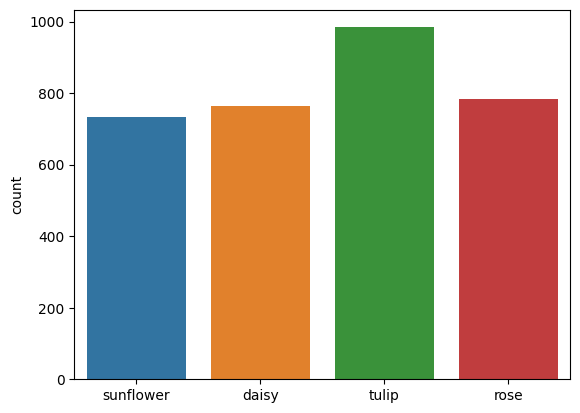

In [ ]:
# YOUR CODE HERE
print(np.unique(labels)) #print out the unique kind/label
sns.countplot(x=labels) #print out the graph
pd.value_counts(labels) #count the total in each kind/label

## **How many images of each class are in the data set?**

['daisy' 'rose' 'sunflower' 'tulip'] [764 784 733 984]


tulip        984
rose         784
daisy        764
sunflower    733
dtype: int64

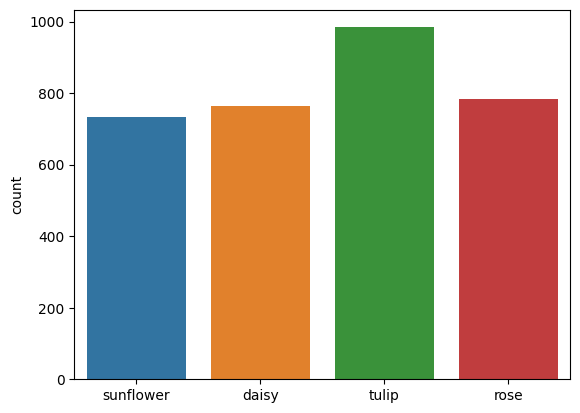

In [ ]:
# YOUR CODE HERE
sns.countplot(x=labels) #print out the graph

(unique, counts) = np.unique(labels, return_counts = True)  #print out unique label and counts for each label
print(unique, counts)

pd.value_counts(labels) #return the label with its corresponding counts

Some follow up questions to consider:
* Do you have enough data in each class?
* Is there any one class that is significantly underrepresented or overrepresented?

## 🔥 **What is an example of one image in each class in the data set?**
*For this one, you should plot (at least) one image for every different class in your data set.*

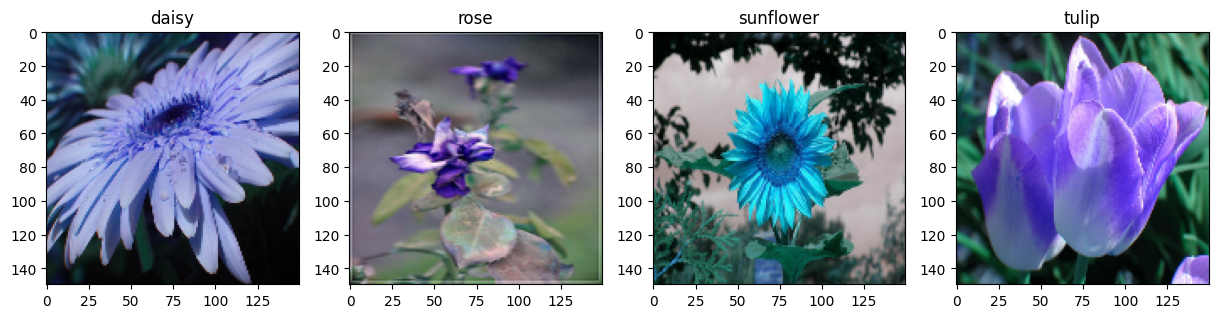

In [ ]:
# YOUR CODE HERE
#there are 4 labels for 4 kinds of flower.
#=> print one img in each kind ==> use plt.subplots(ncols=4)

fig, ax = plt.subplots(ncols = 4, figsize = (15,15))
flowers = ['daisy', 'rose', 'sunflower', 'tulip']

for label in range(len(flowers)):
  location = np.where(labels == flowers[label])
  ax[label].imshow(flower_data[location[0][0]])
  ax[label].title.set_text(flowers[label])         #title.set_text(): set text for title




# 👾 **Accessing Pixel Values in Images**
You've probably used an image crop before, where you segment part of an image out, like below:

![](https://ppom.nmediahosting.com/wp-content/uploads/2013/06/cropping.jpg)

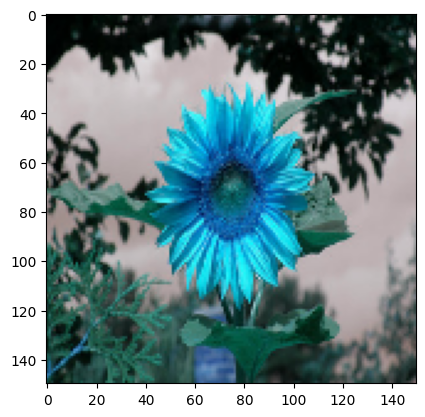

In [ ]:
# Let's grab the first image from our data set
img = flower_data[0]
plt.imshow(img)

Recall that you can access a pixel at the location (5, 5) in the image like:

In [ ]:
img[5][5]

array([1, 3, 3], dtype=uint8)

To get the red color of this specific pixel, you can do:

In [ ]:
img[5][5][0]

1

And you can access an entire row / column / color channel of an image by doing:



In [ ]:
t = img[0, :, :] # first row in the image
v = img[:, 0, :] # first column in the image
h = img[:, :, 0] # first color channel (red)

### ✅ **Check Yourself!**
In the cell above, what are the dimensions of the results from each of the three lines?

In [ ]:
#@markdown What are the dimensions resulting from img[ 0 , : , : ]?
line_1  = "" #@param {type:"string"}

#@markdown What are the dimensions resulting from img[ : , 0 , : ]?
line_2  = "" #@param {type:"string"}

#@markdown What are the dimensions resulting from img[ : , : , 0 ]?
line_3  = "" #@param {type:"string"}


### 📓 **Exercise:** Plotting different color channels
For one image in the data set, visualize each of its three color channels separately!


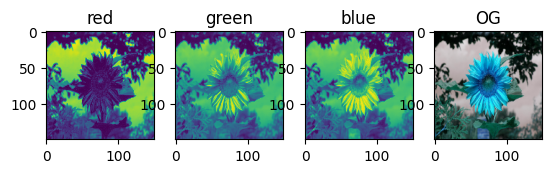

In [ ]:
# YOUR CODE HERE
#plt.imshow(h)
fig, ax = plt.subplots(ncols = 4)
ax[0].imshow(img[:, :, 0])
ax[0].title.set_text("red")

ax[1].imshow(img[:, :, 1])
ax[1].title.set_text('green')

ax[2].imshow(img[:, :, 2])
ax[2].title.set_text('blue')

ax[3].imshow(img)
ax[3].title.set_text('OG')

#plt.imshow(img[:, :, 2])


# 🧗 **Pre-Processing Steps**
Now that we've looked at our data set a bit closer, it's time to process it to get it ready for our machine learning models! There are a lot of possible steps you can take with data pre-processing, so we'll just go over a few of them here.



## ⚫⚪ **Converting to Grayscale**

Sometimes, it's important for machine learning models to include color information, but other times, it's not necessary.

In [ ]:
#@title Think about some different computer vision applications.
#@markdown What are two applications where color is relevant to the classification?
color_relevant = "" #@param {type:"string"}

#@markdown What are two applications where color is NOT relevant to the classification?
color_not_relevant =  "" #@param {type:"string"}

#@markdown Do you think color is relevant for flower classification? Why or why not?
is_color_relevant =  "" #@param {type:"string"}


### ⬜ **Converting to Grayscale**
We can use `skimage`, an `sklearn` library for processing images, to convert our image to black and white by using the `rgb2gray` function in the `color` package. This will create a copy of our original image in grayscale. **Run the cell below to do this.**

In [ ]:
from skimage import color
image = flower_data[0]
gray_image = color.rgb2gray(image)

#### ✅ **Check yourself!**
What should the dimensions of the new image be? Use the cell below to **print out the dimensions** of the original image and the new grayscale image.

In [ ]:
# YOUR CODE HERE
#dimensions of OG image, and gray_image

print('Dimension of OG image is', image.shape)
print('Dimension of new grayscale image is', gray_image.shape)

Dimension of OG image is (150, 150, 3)
Dimension of new grayscale image is (150, 150)


### ⬜ **Plotting in Grayscale**
To plot an image in grayscale, we can use a special parameter for `imshow` called the `cmap`, which changes the color mapping of the image. This does **not** permanently change the image color - it only changes the color map that's visualized.

To see more about color maps, check out [the documentation here](https://matplotlib.org/stable/tutorials/colors/colormaps.html).

Run the cell below to see images in grayscale. Try changing the image number to look at a few samples.

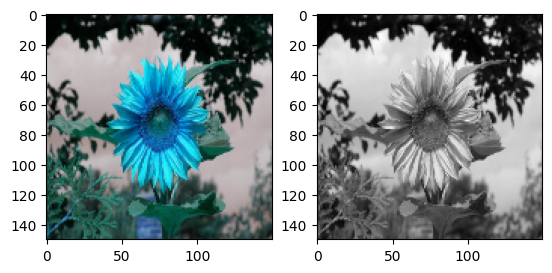

In [ ]:
fig, ax = plt.subplots(ncols=2)
ax[0].imshow(image)
ax[1].imshow(gray_image, cmap="gray")

### 📓 **Exercise:** Make a grayscale data set
Use the cell below to make a **new** data set with grayscale versions of the original data set.

In [ ]:
# YOUR CODE HERE
#new data set contain grayscale versions of OG data set

gray_ver = []

for im in flower_data:
  gray_ver.append(color.rgb2gray(im))

gray_ver = np.array(gray_ver) #keep the new data set as np array if we want

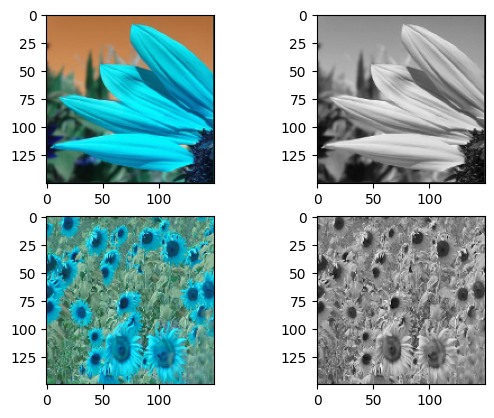

In [ ]:
fig, ax = plt.subplots(ncols = 2, nrows= 2)
ax[0,0].imshow(flower_data[3])     #ax[row, col]: ax[first row, first col]
ax[0,1].imshow(color.rgb2gray(flower_data[3]), cmap = 'gray') #ax[first row, second col]

ax[1, 0].imshow(flower_data[4]) #ax[second row, first col]
ax[1, 1].imshow(color.rgb2gray(flower_data[4]), cmap='gray') #ax[2nd row, 2nd col]


## ➗ **Normalization**

This is also sometimes refered to as *data re-scaling* - it scales images or values in a data set to be within a certain range. Among other benefits, normalization allows our images to not be pixel dependent for their loss - in other words, all images **contribute equally** to the total loss images with generally higher value pixels and lower value pixels ranges give strong and weak loss, respectively.

To normalize our pixels between 0 and 1 for an image, we have to
1. Subtract the minimum value in the image from the image
2. Divide by the maximum value in the image minus the minimum value in the image.

**Implement this behavior for one image by filling in the function below.**



In [ ]:
def normalize_one_image(image):
  """
    This function takes in an image and returns the same image normalized on a 0 to 1 scale
  """
  img_min = np.min(image)
  img_max = np.max(image)

  res = (image - img_min)/(img_max - img_min)

  # YOUR CODE HERE
  return res

### 📓 **Exercise:** Create a normalized data set
Apply one of the functions to your data set -- the color mapping you choose (color or b&w) is up to you!

In [ ]:
# YOUR CODE HERE
norm_im = []

for p in gray_ver:
  norm_im.append(normalize_one_image(p)) #append normalized photo/img in gray_ver data set to the new data set

norm_im = np.array(norm_im)

## 🔀 **Data Augmentation**
We're not going to go over data augmentation extensively in code (if you want to see how it works, check out the data augmentation section in the CNN notebook from last week!), but let's think a bit about it! Below are the list of operations available to us. Out of these, **which ones do or do not make sense for our application**?





In [ ]:
horizontal_flip = "" #@param ["would work", "would not work", "need to be cautious using", ""]
vertical_flip  = "" #@param ["would work", "would not work", "need to be cautious using", ""]
rotation = "" #@param ["would work", "would not work", "need to be cautious using", ""]
vertical_shift = "" #@param ["would work", "would not work", "need to be cautious using", ""]
horizontal_shift = "" #@param ["would work", "would not work", "need to be cautious using", ""]
zoom = "" #@param ["would work", "would not work", "need to be cautious using", ""]
shearing = "" #@param ["would work", "would not work", "need to be cautious using", ""]



### 🔃 **Shifting images**
One thing to note: what actually happens when you shift an image that doesn't have a solid color background? Let's take a look!




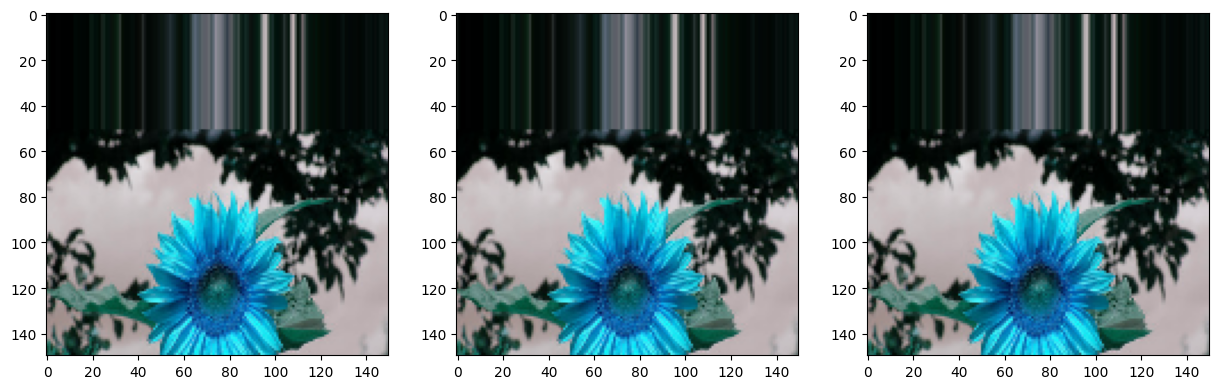

In [ ]:
datagen = ImageDataGenerator(width_shift_range=[-50,50])
image = flower_data[0]

# expand dimension to one sample
samples = expand_dims(image, 0)

# create an iterator
it = datagen.flow(samples, batch_size=1)
fig, im = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# generate batch of images
for i in range(3):
    # convert to unsigned integers
    image = next(it)[0].astype('uint8')
    # plot image
    im[i].imshow(image)

## 📠 **Changing our labels to be machine-understandable!**
Right now, our labels are strings of the different flower types available to us. Use the cell below to **transform them** into a format the machine can understand! To do this, we'll have to assign a one-hot encoding to every class, go through the `labels` list, and add the one-hot encoding for the corresponding label to a new list.

In [ ]:
# YOUR CODE HERE
list_ = []
for item in labels:
  #add one-hot encoding for corresponding label.
  #append that to list_



SyntaxError: ignored

In [ ]:
#@title Instructor Solution
# there are many ways to do this, but here is one solution
one_hot_labels = []
flowers = ["tulip", "rose", "daisy", "sunflower"]
for label in labels:
  new_label = np.zeros(4)
  new_label[flowers.index(label)] = 1
  one_hot_labels.append(new_label)

one_hot_labels = np.array(one_hot_labels)


## 🟪 🔶 **Reshaping our Data**
We know that when we're working with CNNs, our models can take in images with multiple dimensions. However, when we're working with other models, we might need to make our image data 1-D for the model to work.


In [ ]:
#@title If we transform our images to be one dimensional, what should the dimensions of `flower_data` be?
one_d_data_dims = "" #@param {type:"string"}

### ➖ **Transforming to 1-D**
Use the cell below to make a version of `flower_data` with one-dimensional images.

In [ ]:
# YOUR CODE HERE
one_dim_data = np.reshape(flower_data, (3265, 150*150*3))

one_dim_data_gray = np.reshape(gray_ver, (3265, 150*150))

# 🪣 **Final step: prepping testing and training data sets**
For your specific application, it's important to think about how you want to split your data. We've used `train_test_split` numerous times in the past, but let's take a closer look at what's available to us!

[Click here to see the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).

We usually use it like this:
```python
train_test_split(X, y, test_size=0.2, random_state=9)
```
Here, we're using an 80/20 training/testing data split and setting the random state to 9. The random state ontrols the shuffling applied to the data before applying the split, which means that passing in any random state and keeping it consistent means that you should have reproducable results from your models.

There's also another parameter we don't normally use: `stratify`, which should be set to an array. Stratifying ensures that the same proportion of each class will be in the training and testing set.

Both the **performance** and the **runtime** of the model training will influence what split you choose for your model. This is a value you can test out and iterate on!

<font color="#6495ED"><h1><b>That's it for data pre-processing!</b></h1></font>
<h4>Like we said earlier, there are a number of ways to process data before sending it to your model, and here we've just covered some. Hopefully this will help you know how to begin your project code! </h4>